# First version of ML model

In [1]:
# import all needed libs
import pandas as pd
import numpy as np

# read datasets into datadframe
train_set = pd.read_pickle('../train_val_test_data/train_set.pkl')
validation_set = pd.read_pickle('../train_val_test_data/validation_set.pkl')
test_set = pd.read_pickle('../train_val_test_data/test_set.pkl')

# Remove all NaN rows / TODO: investigate and improve this 
train_set = train_set.dropna(subset=['Umsatz'])
validation_set = validation_set.dropna(subset=['Umsatz'])

# check if NaN left
#print(test_set.isna().sum())


#train_set.head()

train_set.columns

Index(['Datum', 'Warengruppe', 'Umsatz', 'Bewoelkung', 'Temperatur',
       'Windgeschwindigkeit', 'Wettercode', 'Jahr_Monat', 'monthly_mean_temp',
       'monthly_mean_temp_diff', 'sunny', 'Wind_Kategorie', 'rainday',
       'KielerWoche', 'Salesindex', 'HolyCode', 'SchholCode', 'BinHoly',
       'BinSchhol', 'BinElec', 'DayOfWeek', 'weekend'],
      dtype='object')

In [22]:
def prepare_features(data_df):
    # Define categorical features
    categorical_features = ['Warengruppe', 'Wind_Kategorie']

    # Inspect data types and unique values for categorical columns
    #print(data_df[categorical_features].dtypes)
    #print("Unique Values:\n",data_df[categorical_features].apply(lambda x: x.unique()))

    # Ensure categorical columns are treated as categories
    for col in categorical_features:
        data_df[col] = data_df[col].astype('category')

    # Encode categorical variables using pd.get_dummies
    features = pd.get_dummies(data_df[categorical_features], drop_first=True, dtype=int)

    # Include any numeric columns that are not categorical
    features['rainday'] = data_df['rainday']
    features['Salesindex'] = data_df['Salesindex']
    features['monthly_mean_temp_diff'] = data_df['monthly_mean_temp_diff']
    features['sunny'] = data_df['sunny']
    features['KielerWoche'] = data_df['KielerWoche']
    features['BinHoly'] = data_df['BinHoly']
    features['BinSchhol'] = data_df['BinSchhol']
    features['weekend'] = data_df['weekend']

    # Construct the prepared data set including the dependent variable ('label')
    # prepared_data = pd.concat([data_df[['Umsatz']], features], axis=1).dropna()

    return features

# We need separated features and labels

# create the lable first
training_features =prepare_features(train_set)
validation_features = prepare_features(validation_set)
test_features = prepare_features(test_set)


# Add Umsatz to training and validation lables
training_labels = train_set[['Umsatz']]
validation_labels = validation_set[['Umsatz']]
# test_data contains no lable for Umsatz 

#test_labels = test_data[['Umsatz']]

# Display the shape of the prepared data set
#print(training_features.shape)
# Display the first few rows of the prepared data set
#print(training_features.head(5))

#print(training_labels.shape)
#print(training_labels.head(5))

#print(train_set.head(5))

# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column


# check for infinite numbers
#print(np.isfinite(training_features).all())
#print(np.isfinite(training_labels).all())


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(32, activation='relu'),
  Dense(15, activation='relu'),
  Dense(1)
])

model.summary()

model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=250,
                    validation_data=(validation_features, validation_labels))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083 (4.23 KB)

 Trainable params: 1,053 (4.11 KB)

 Non-trainable params: 30 (120.00 B)

Epoch 1/250


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 62353.3672 - val_loss: 29024.4980
Epoch 2/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16552.8516 - val_loss: 6525.2422
Epoch 3/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9263.2910 - val_loss: 5268.8271
Epoch 4/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7416.9702 - val_loss: 4972.0664
Epoch 5/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7771.3496 - val_loss: 4791.8501
Epoch 6/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8517.8457 - val_loss: 4750.1021
Epoch 7/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6481.5869 - val_loss: 4632.2539
Epoch 8/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7451.1035 - val_loss: 4641.2012
Epoch 9/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6287.0469 - val_loss: 4600.8809
Epoch 10/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6297.9438 - val_loss: 4613.0630
Epoch 11/250
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6843.9565 - val_

In [23]:
model.save("python_model.keras")

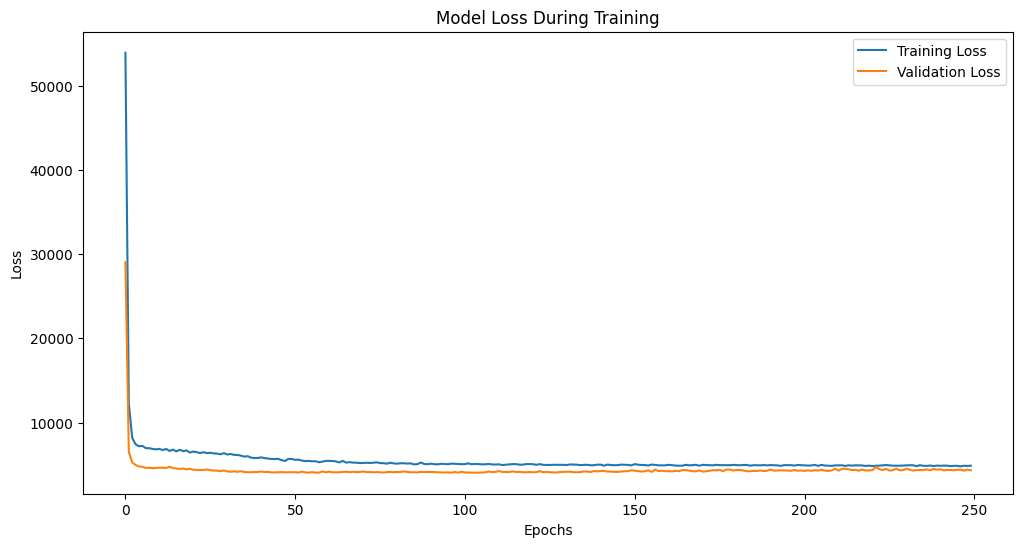

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Making Predictions and Evaluating the Model
Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [25]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

  1/235 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
MAPE on the Training Data: 24.55%
MAPE on the Validation Data: 27.09%


### Plot predictions

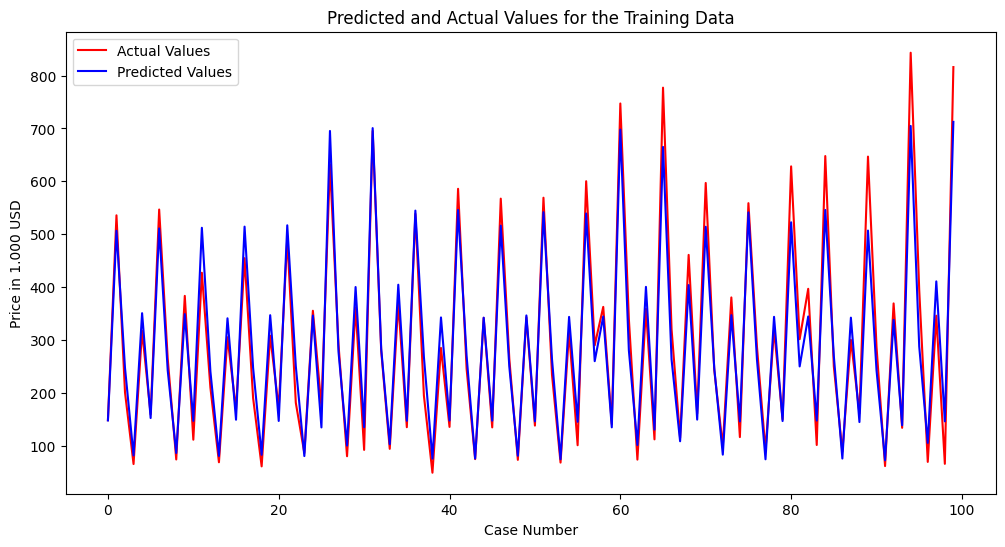

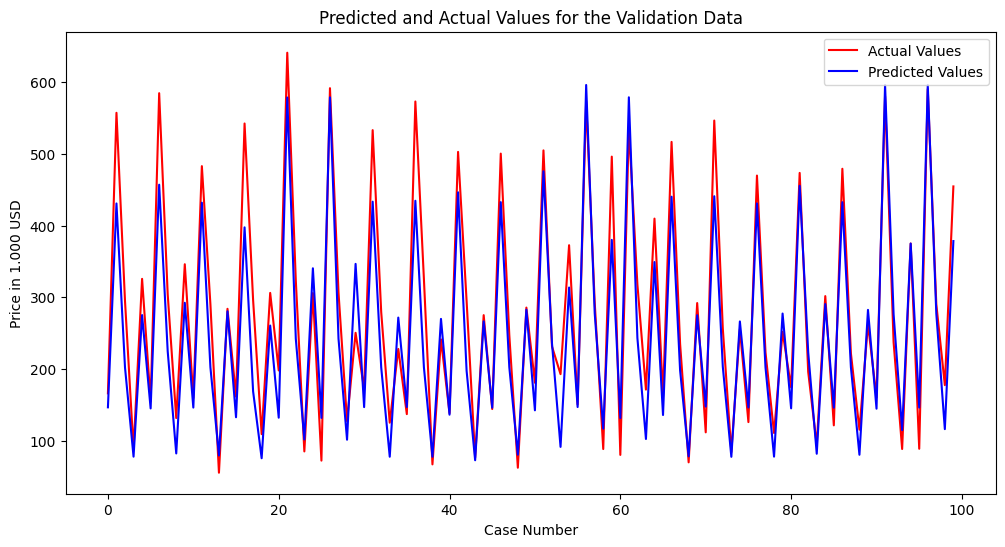

In [26]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

### Calculate test results to submit to kaggle

In [27]:
# calculate predictions for testdata
test_predictions = model.predict(test_features)

# flatten and convert from numpy into pandas dataframe
test_predictions = np.array(test_predictions).flatten()
test_predictions_df = pd.DataFrame({'Umsatz': test_predictions})

test_predictions_df.head()

test_set.head()

# merge the IDs from test date togther with Umsatz predictions
# TODO: check if we have any problems because of no common date index on both dataframes
submission_set = pd.concat([test_set['id'], test_predictions_df['Umsatz']], axis=1)

# Check if the count of dataset is correct for kaggle upload
if submission_set.shape[0] == 1830:
    print("OK : DataFrame has exact 1830 Entries!")
else:
    print(f"ERROR Dataframe has wrong number of {submission_set.shape[0]} Entries!")

# store the submission data
submission_set.to_csv('../prediction_data/submission.csv', index=False)

 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
OK : DataFrame has exact 1830 Entries!
